<a href="https://colab.research.google.com/github/louzeiro/trabalhosUSP/blob/main/mlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



SME0823 Modelos de Regressão e Aprendizado Supervisionado II<br>
Trabalho 01: Modelo linear generalizado - Distribuição binomial <br>

Flaviane Louzeiro da Silva, nUSP: 11885075

# Carregamento dos dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy


In [2]:
dose = [10.2, 7.7, 5.1, 3.8, 2.6, 0.0]
m = [50, 49, 46, 48, 50, 49]
y = [44, 42, 24, 16, 6, 0]

dados = pd.DataFrame()
dados['dose'] = dose
dados['m'] = m
dados['y'] = y
dados['dif'] = dados['m']-dados['y']
print(dados)

#diferenca = np.array([y, np.subtract(m, y)])
#dados = pd.DataFrame(y, )

   dose   m   y  dif
0  10.2  50  44    6
1   7.7  49  42    7
2   5.1  46  24   22
3   3.8  48  16   32
4   2.6  50   6   44
5   0.0  49   0   49


# Gráfico de dispersão

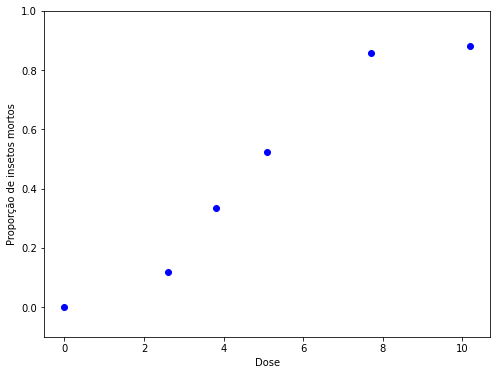

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(dados['dose'], dados['y']/dados['m'],'o', color='blue')
plt.ylabel('Proporção de insetos mortos')
plt.xlabel('Dose')
plt.ylim(-0.1, 1); # ajustando os limites do gráfico

# Ligação Canônica (default)

In [4]:
mcan = smf.glm(formula='y + dif ~ dose ', family=sm.families.Binomial(), data=dados).fit()
print(mcan.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y', 'dif']   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.739
Date:                Wed, 28 Sep 2022   Deviance:                       10.258
Time:                        16:56:34   Pearson chi2:                     9.70
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2257      0.370     -8.720      0.0

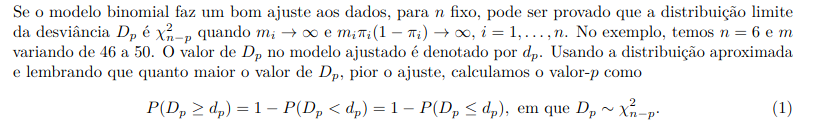

In [5]:
1-scipy.stats.chi2.cdf(mcan.deviance, mcan.df_resid)

0.036294072301364055

Conclusão: com 1% de significância, não rejeitamos a hipótese de que o modelo faz um bom ajuste aos dados.

## Nota 1: Sobreponha a curva ajustada ao gráfico.

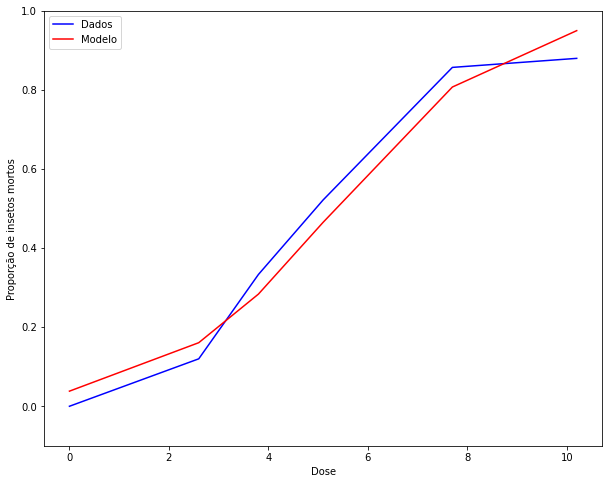

In [124]:
from matplotlib import legend
plt.figure(figsize=(10, 8))
plt.plot(dados['dose'], dados['y']/dados['m'], color='blue', label='Dados')
plt.plot(dados['dose'], mcan.fittedvalues, color='red', label='Modelo')
plt.ylabel('Proporção de insetos mortos')
plt.xlabel('Dose')
plt.ylim(-0.1, 1) # ajustando os limites do gráfico
plt.legend()
plt.show()

# Intervalos de Confiança assintóticos

In [42]:
ic = mcan.conf_int()
print('O intervalo de confiança para o intercepto é:','\nLimite Inferior:', ic.iat[0,0], '\nLimite Superior:', ic.iat[0,1], )
print('----------------------------------------------------')
print('O intervalo de confiança para a dose é:','\nLimite Inferior:', ic.iat[1,0], '\nLimite Superior:', ic.iat[1,1], )

O intervalo de confiança para o intercepto é: 
Limite Inferior: -3.9506861825403368 
Limite Superior: -2.5006404425926725
----------------------------------------------------
O intervalo de confiança para a dose é: 
Limite Inferior: 0.4722155629855844 
Limite Superior: 0.7380355483194043


# Razão de chances

In [60]:
import math
rc = math.exp(mcan.params[1])
print('Razão de chances =', rc)

Razão de chances = 1.8314821473864789


## Nota 2: Apresente um intervalo de confiança para a razão de chances.


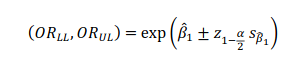


In [123]:
conf = 0.95
z = scipy.stats.norm.ppf((1 + conf) / 2)
b1 = mcan.params[1]
S = mcan.bse[1]
IC_inf = math.exp(b1-z*S*b1)
IC_sup = math.exp(b1+z*S*b1)
print('Intervalo de confiança (alpha=5%):')
print('Limite inferior:', IC_inf)
print('Limite superior:', IC_sup)

Intervalo de confiança (alpha=5%):
Limite inferior: 1.6899489518758684
Limite superior: 1.9848687455748504


# Dose letal

É de interesse estimar as doses de inseticida que eliminam 50% e 90% dos insetos, denotadas por DL50 e
DL90, respectivamente. 

In [127]:
import numpy as np
import scipy.stats as st

def DL(prob):
  dl = math.log(prob / (1-prob)) - mcan.params[0]/mcan.params[1]
  return dl

def IC(x):
  

print('Para a eliminação de 50% dos insetos a dose letal é:',DL(0.5))
print('Com intervalo de confiança:')
print('Limite inferior:')
print('Limite superior:')
print('Para a eliminação de 90% dos insetos a dose letal é:',DL(0.9))
print('Com intervalo de confiança:')
print('Limite inferior:')
print('Limite superior:')

Para a eliminação de 50% dos insetos a dose letal é: 5.3305686438715
Com intervalo de confiança:
Limite inferior:
Limite superior:
Para a eliminação de 90% dos insetos a dose letal é: 7.52779322120772
Com intervalo de confiança:
Limite inferior:
Limite superior:


# Inversa das funções de ligação

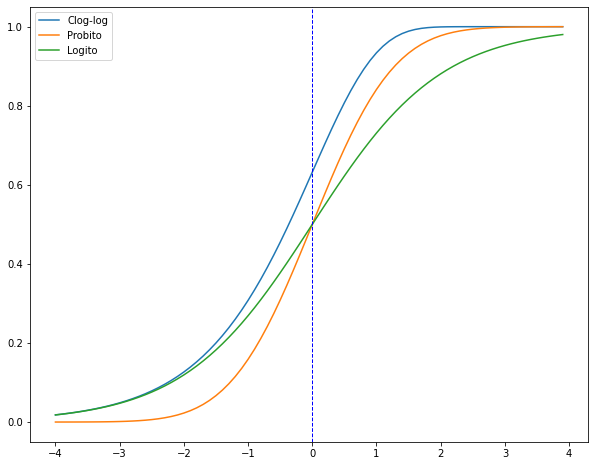

In [120]:
def plotlog(x):
  return (1-math.exp(-math.exp(x)))

def plogit(x):
  return(math.exp(x)/(1+math.exp(x)))

x = np.arange(-4,4, 0.1)  # valores de x

y1 = []; y2 = []; y3 = [] #vetores auxiliares

for i in range(len(x)):
  y1.append(plotlog(x[i]))
  y2.append(scipy.stats.norm.cdf(x[i]))
  y3.append(plogit(x[i]))

plt.figure(figsize=(10, 8))
plt.plot(x,y1, label = 'Clog-log')
plt.plot(x,y2, label = 'Probito')
plt.plot(x,y3,label = 'Logito')
plt.legend()
plt.axvline(x=0, color='b',linewidth=1, linestyle='--')